# Wordcloud sur haïkus

In [99]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [85]:
os.chdir("C:/Users/maxim/Documents/ensae-python-2018/Data/")

In [89]:
base_haikus = pd.read_csv("haikus_fraction_20181108.csv","|")

In [95]:
base_haikus.head()

,url,id_auteur,auteur,sexe,pays,haiku
0,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,quin-p,Philippe Quinta,H,France,"Fut-elle pleine\\déjà, elle décroit\\la lune"
1,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,py-d,Daniel Py,H,France,Lune parfaitement ronde\\Buée sur la vitre
2,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,alex-m,Marlène Alexa,F,Egypte,hiver\\dans les yeux de grand-mère\\une ombre...
3,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,sang-r,Rahmatou Sangotte,F,France,gray skies -\\the smell of\\caramelized onions
4,http://www.tempslibres.org/tl/tlphp/dbhk03.php...,rais-c,Carol Raisfeld,F,USA,la fille du pasteur\\sa robe du dimanche\\de ...


In [100]:
len(base_haikus)

898

In [102]:
base_haikus[' haiku ']

0           Fut-elle pleine\\déjà, elle décroit\\la lune
1             Lune parfaitement ronde\\Buée sur la vitre
2       hiver\\dans les yeux de grand-mère\\une ombre...
3         gray skies -\\the smell of\\caramelized onions
4       la fille du pasteur\\sa robe du dimanche\\de ...
5         Sans toi\\sous le ciel d'hiver\\nos pas perdus
6               petit noir -\\les cernes\\de la serveuse
7       Avant de partir,\\dans le miroir du salon\\te...
8       brusques giboulées -\\pleurs et puis rires de...
9       les mots sous les doigts\\l'aveugle et son li...
10      les jours s'allongent\\même la gloire du mati...
11      sur mon smartphone\\le mont fuji au soleil co...
12      l'orage s'éloigne -\\d'une fenêtre ouverte\\u...
13      nouvelle lune --\\la souris dans le grenier\\...
14             sundow\\still warmth\\in her rosary beads
15      encore errant\\dans le couloir vide --\\un pa...
16      sortant du métro\\face à face avec la lune -\...
17      j'oublie sa voix\\la le

In [110]:
sum(base_haikus[' sexe ']==" F ")

270

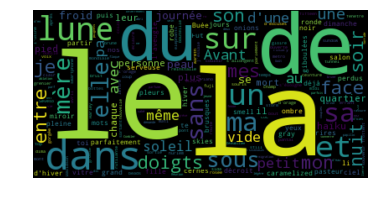

In [111]:
# Start with one review:
haikus = str(base_haikus[" haiku "])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(haikus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [112]:
### Remove stopwords
import nltk

from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))

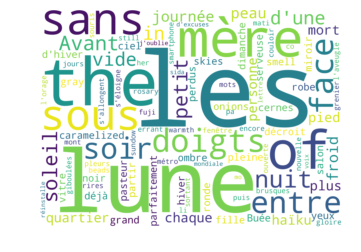

In [114]:
wordcloud2 = WordCloud(   stopwords=stopwords,
                          background_color='white',
                          width=2500,
                          height=1800, 
                        max_words=100, 
                         ).generate(haikus)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.show()

In [128]:
haikus_F = str(base_haikus[base_haikus[' sexe '] == " F "][" haiku "])
haikus_H = str(base_haikus[base_haikus[' sexe '] == " H "][" haiku "])

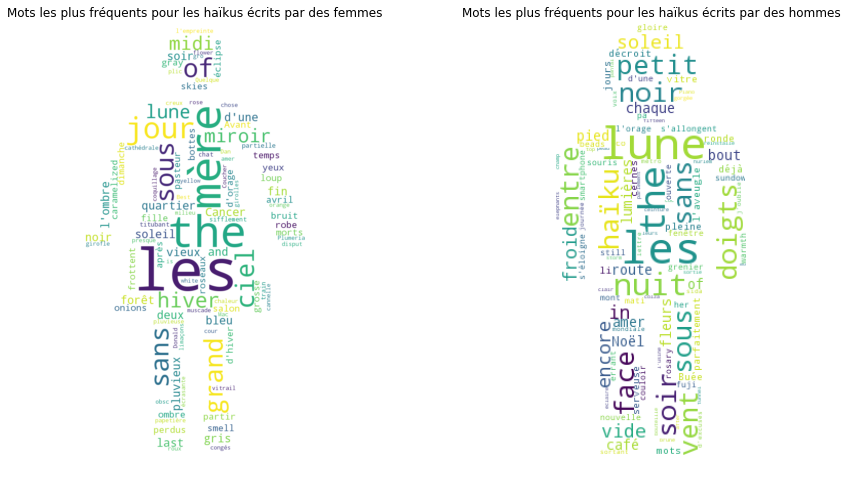

In [170]:
# Wordcloud pour les haikus écrits par des hommes et des femmes

# Pour les femmes
masqueF = np.array(Image.open("images/symbole-femme.png"))
wordcloud_femmes = WordCloud(stopwords=stopwords, 
                             background_color="white", 
                             #mode="RGBA", 
                             max_words=100, 
                             mask=masqueF).generate(haikus_F)

# Pour les hommes
masqueH = np.array(Image.open("images/symbole-man2.png"))
wordcloud_hommes = WordCloud(stopwords=stopwords, 
                             background_color="white", 
                             mode="RGBA", 
                             max_words=100, 
                             mask=masqueH).generate(haikus_H)
# Plot
# plt.figure(figsize=[7,7])
# Plot des graphes
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(wordcloud_femmes, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les haïkus écrits par des femmes")
ax2 = fig.add_subplot(1,2,2)
plt.imshow(wordcloud_hommes, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les haïkus écrits par des hommes")

# store to file
plt.savefig("images/wordcloud_v1_20181108.png", format="png")